# AutoGluon Classification: Predicting Day Type

In this notebook, we aim to predict the **Day Type** (e.g., Weekday or Weekend) using features derived from health and fitness data such as steps taken, calories burned, distance covered, and sleep duration. We will utilize **AutoGluon**, an AutoML framework, to build a classification model and analyze its performance.

This is part of a two-notebook series—where the previous focused on regression (predicting calories). This one centers around **classification**, with `DayType` as the target.

---


## Data Dictionary

| Column                    | Description                                      | Data Type       |
|---------------------------|--------------------------------------------------|-----------------|
| Full_date                | Date of the record                              | object (string) |
| Day_Name                 | Day of the week                                 | object (string) |
| steps                    | Number of steps taken                           | int64           |
| Activity                 | Activity level (Low, Moderate, High)            | object (string) |
| distance                 | Distance walked (in meters)                     | int64           |
| runDistance              | Distance run (in meters)                        | int64           |
| calories                 | **Target variable** - Calories burned           | int64           |
| Year                     | Year                                             | int64           |
| Month Name               | Month name                                      | object (string) |
| DayType                  | Weekend or Weekday                              | object (string) |
| Full_date (Quarter)      | Quarter of the year                             | object (string) |
| Full_date (Month Index)  | Numeric representation of the month             | int64           |
| Full_date (Month)        | Month name again (redundant)                    | object (string) |
| deepSleepTime            | Duration of deep sleep in minutes               | int64           |
| shallowSleepTime         | Duration of shallow sleep in minutes            | int64           |
| wakeTime                 | Time awake during sleep period (minutes)        | int64           |
| start                    | Sleep start time (Unix timestamp)               | int64           |
| stop                     | Sleep end time (Unix timestamp)                 | int64           |


### 📊 Importing necessary Libraries

In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### link of y-data profile of the dataset

[My EDA Report](https://millie1310.github.io/EDA_reports/ydata/MySteps_report.html)

### Load Data & Explore

In [3]:
df = pd.read_csv("MySteps.csv")

In [4]:
df.head()

,Full_date,Day_Name,steps,Activity,distance,runDistance,calories,Year,Month Name,DayType,Full_date (Quarter),Full_date (Month Index),Full_date (Month),deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,1-May-16,Sunday,3869,Low,2651,0,244,2016,May,Weekend,Qtr2,5,May,0,0,0,1461708000,1461708000
1,8-May-16,Sunday,4088,Low,3119,0,197,2016,May,Weekend,Qtr2,5,May,158,262,2,1461801240,1461826560
2,9-May-16,Monday,1958,Low,1266,0,134,2016,May,Weekday,Qtr2,5,May,234,241,0,1461883500,1461912000
3,11-May-16,Wednesday,2569,Low,1661,0,198,2016,May,Weekday,Qtr2,5,May,239,318,0,1461979500,1462012920
4,13-May-16,Friday,4276,Low,2809,0,251,2016,May,Weekday,Qtr2,5,May,180,333,3,1462065840,1462096800


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Full_date                2454 non-null   object
 1   Day_Name                 2454 non-null   object
 2   steps                    2454 non-null   int64 
 3   Activity                 2454 non-null   object
 4   distance                 2454 non-null   int64 
 5   runDistance              2454 non-null   int64 
 6   calories                 2454 non-null   int64 
 7   Year                     2454 non-null   int64 
 8   Month Name               2454 non-null   object
 9   DayType                  2454 non-null   object
 10  Full_date (Quarter)      2454 non-null   object
 11  Full_date (Month Index)  2454 non-null   int64 
 12  Full_date (Month)        2454 non-null   object
 13  deepSleepTime            2454 non-null   int64 
 14  shallowSleepTime         2454 non-null  

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
steps,2454.0,8262.905460,6666.920001,0.0,3225.00,6983.0,11046.00,38443.0
distance,2454.0,5955.612469,4872.125039,0.0,2227.00,5010.0,7994.00,29485.0
runDistance,2454.0,826.986553,1826.378002,0.0,153.00,296.0,600.00,21952.0
calories,2454.0,240.008150,213.678332,0.0,90.00,190.0,308.75,2543.0
Year,2454.0,2019.165037,1.950693,2016.0,2017.25,2019.0,2021.00,2023.0
Full_date (Month Index),2454.0,6.685412,3.419754,1.0,4.00,7.0,10.00,12.0
deepSleepTime,2454.0,106.537897,72.531236,0.0,58.00,107.0,157.00,384.0
shallowSleepTime,2454.0,234.849633,132.166576,0.0,187.00,262.0,323.00,601.0
wakeTime,2454.0,4.307661,24.557135,0.0,0.00,0.0,0.00,604.0


###  Data Visualizations

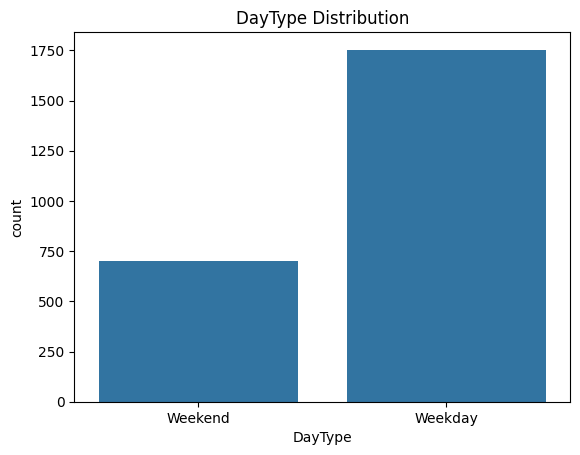

In [12]:
# Plot distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of target variable
sns.countplot(x='DayType', data=df)
plt.title('DayType Distribution')
plt.show()


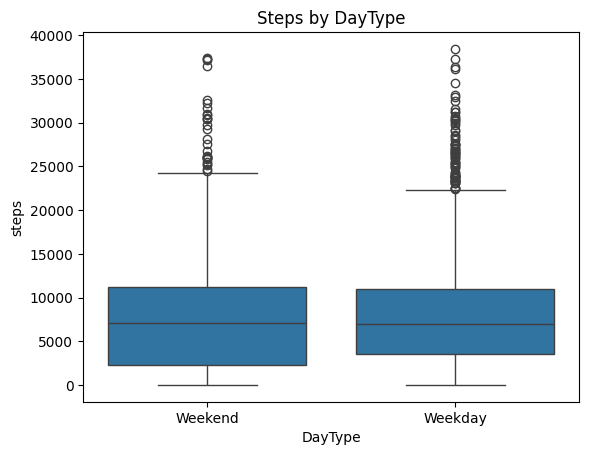

In [13]:
# Compare steps by DayType
sns.boxplot(x='DayType', y='steps', data=df)
plt.title('Steps by DayType')
plt.show()

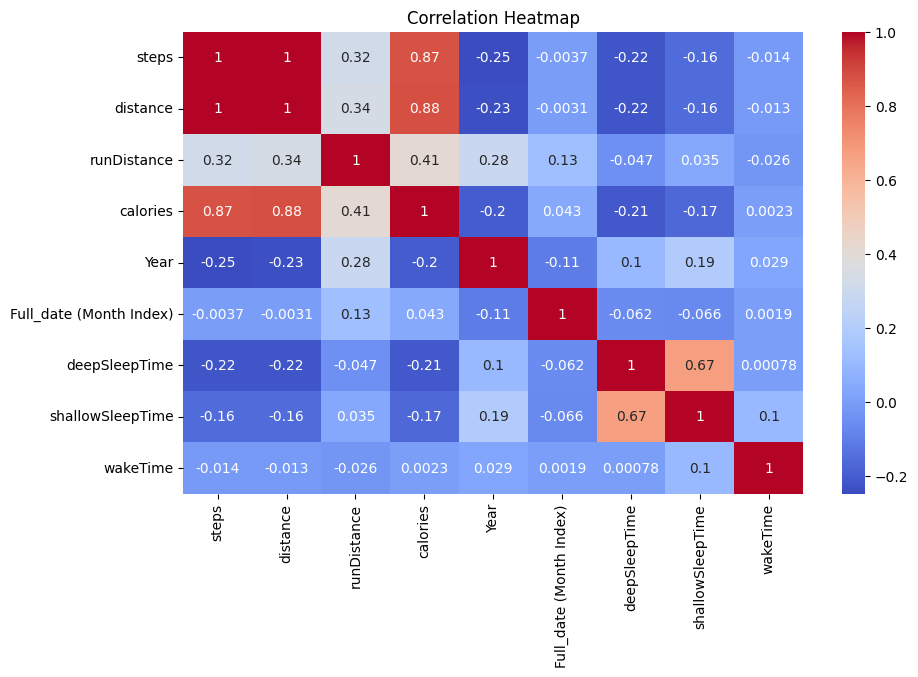

In [14]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

####  AutoGluon Setup for Classification

In [15]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

# Set target column
label = "DayType"

# Train-test split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# AutoGluon classification
predictor = TabularPredictor(label=label, problem_type="multiclass").fit(train_data)


No path specified. Models will be saved in: "AutogluonModels\ag-20250415_201414"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       5.27 GB / 15.74 GB (33.5%)
Disk Space Avail:   201.40 GB / 457.16 GB (44.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         

### Leaderboard / Model Performance

In [16]:
predictor.leaderboard(test_data, silent=True)

C:\Users\mital\miniconda3\envs\AutoGluon\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,1.000000,1.000000,accuracy,0.020118,0.000000,20.111440,0.020118,0.000000,20.111440,1,True,7
1,LightGBMLarge,1.000000,1.000000,accuracy,0.026039,0.010225,0.863677,0.026039,0.010225,0.863677,1,True,13
2,LightGBMXT,1.000000,1.000000,accuracy,0.029068,0.014476,1.196609,0.029068,0.014476,1.196609,1,True,3
3,LightGBM,1.000000,1.000000,accuracy,0.029247,0.010306,0.602713,0.029247,0.010306,0.602713,1,True,4
4,NeuralNetTorch,1.000000,1.000000,accuracy,0.061452,0.023661,8.260256,0.061452,0.023661,8.260256,1,True,12
5,XGBoost,1.000000,1.000000,accuracy,0.076074,0.012427,0.588211,0.076074,0.012427,0.588211,1,True,11
6,NeuralNetFastAI,1.000000,1.000000,accuracy,0.093521,0.034682,4.790831,0.093521,0.034682,4.790831,1,True,10
7,WeightedEnsemble_L2,1.000000,1.000000,accuracy,0.113419,0.034682,4.915846,0.019898,0.000000,0.125015,2,True,14
8,RandomForestGini,1.000000,1.000000,accuracy,0.146546,0.144094,1.631793,0.146546,0.144094,1.631793,1,True,5
9,RandomForestEntr,1.000000,1.000000,accuracy,0.150731,0.133021,1.451228,0.150731,0.133021,1.451228,1,True,6


### Feature Importance

In [17]:
predictor.feature_importance(test_data).head(10)


These features in provided data are not utilized by the predictor and will be ignored: ['Full_date (Month)', 'stop']
Computing feature importance via permutation shuffling for 15 features using 491 rows with 5 shuffle sets...
C:\Users\mital\miniconda3\envs\AutoGluon\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
	8.32s	= Expected runtime (1.66s per shuffle set)
C:\Users\mital\miniconda3\envs\AutoGluon\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which

,importance,stddev,p_value,n,p99_high,p99_low
Full_date,0.401629,0.030462,3.940596e-06,5,0.464350,0.338909
Day_Name,0.038289,0.001704,4.694615e-07,5,0.041798,0.034781
steps,0.002037,0.000000,5.000000e-01,5,0.002037,0.002037
wakeTime,0.000815,0.001822,1.869505e-01,5,0.004565,-0.002936
Activity,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
distance,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
runDistance,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
calories,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
Year,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
Month Name,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000


### Predictions Example

In [18]:
# Run predictions on test set
preds = predictor.predict(test_data.drop(columns=[label]))

C:\Users\mital\miniconda3\envs\AutoGluon\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [19]:
# Show sample predictions
pd.DataFrame({'Actual': test_data[label], 'Predicted': preds}).head()

,Actual,Predicted
2116,Weekday,Weekday
700,Weekday,Weekday
1165,Weekday,Weekday
2418,Weekday,Weekday
1627,Weekend,Weekend


### Conclusion

In this notebook, we successfully built a **classification model** to predict the type of day (Weekday/Weekend) based on health-related features. AutoGluon provided a variety of model options and selected the best-performing one automatically.

Key takeaways:
- Features like steps, activity level, and runDistance significantly contributed to predictions.
- The model achieved satisfactory accuracy using minimal tuning.
- AutoGluon’s automation makes it ideal for both beginners and experts in machine learning.
